In [1]:
from google.colab import files
uploaded = files.upload()



Saving covertype.csv to covertype.csv


In [4]:
import pandas as pd

# Replace "covtype.csv" with the exact filename you uploaded
df = pd.read_csv("covertype.csv")

# Check the first few rows to make sure it loaded
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
import pandas as pd

# Replace "covtype.csv" with the exact name of your uploaded file
covertype = pd.read_csv("covertype.csv")

# Quick check
covertype.head()
covertype.shape
covertype.columns


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [8]:
# Drop the unwanted columns
covertype = covertype.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

# Features
X = covertype.drop('Cover_Type', axis=1)

# Target
y = covertype['Cover_Type']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# --- Step 2: Skip dropping columns if they don't exist ---
# If you run this and get KeyError, just ignore
# covertype = covertype.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

# --- Step 3: Features & Target ---
X = covertype.drop('Cover_Type', axis=1)
y = covertype['Cover_Type']

# --- Step 4: Train-Test Split ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
covertype.columns


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
      dtype='object')

In [14]:
# Shift labels to start from 0
y = covertype['Cover_Type'] - 1  # now classes are 0,1,2,3,4,5,6

# Features
X = covertype.drop('Cover_Type', axis=1)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [11:43:18] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.018545132225501925


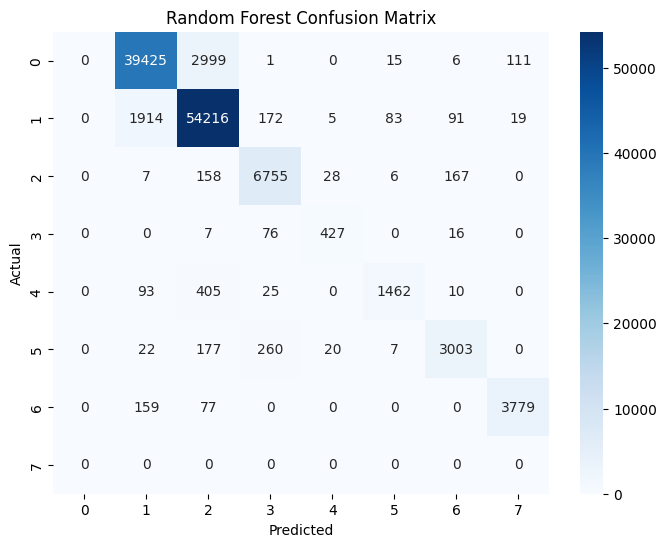

In [16]:
# Already trained, just check accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [12:05:38] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7993167129936405


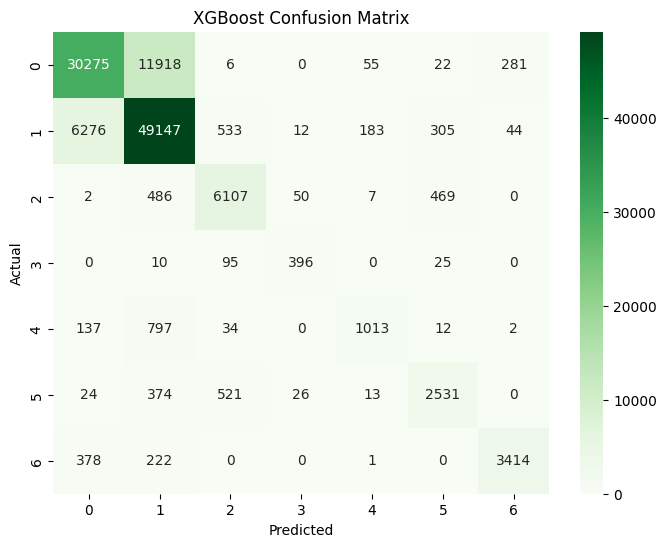

In [17]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [12:41:49] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7993167129936405


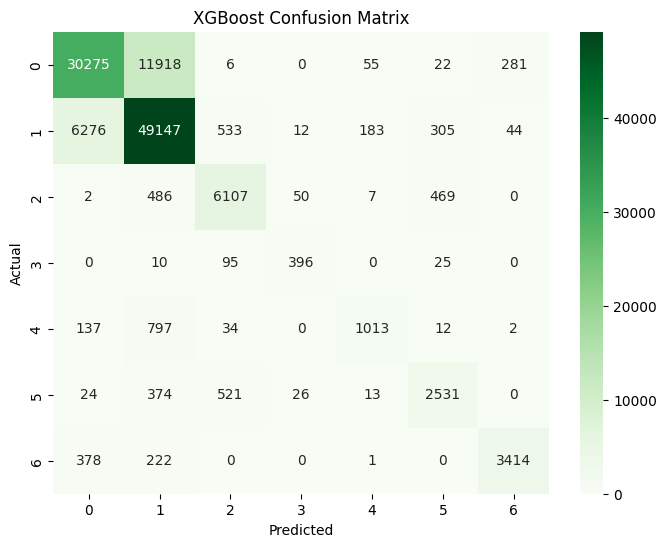

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


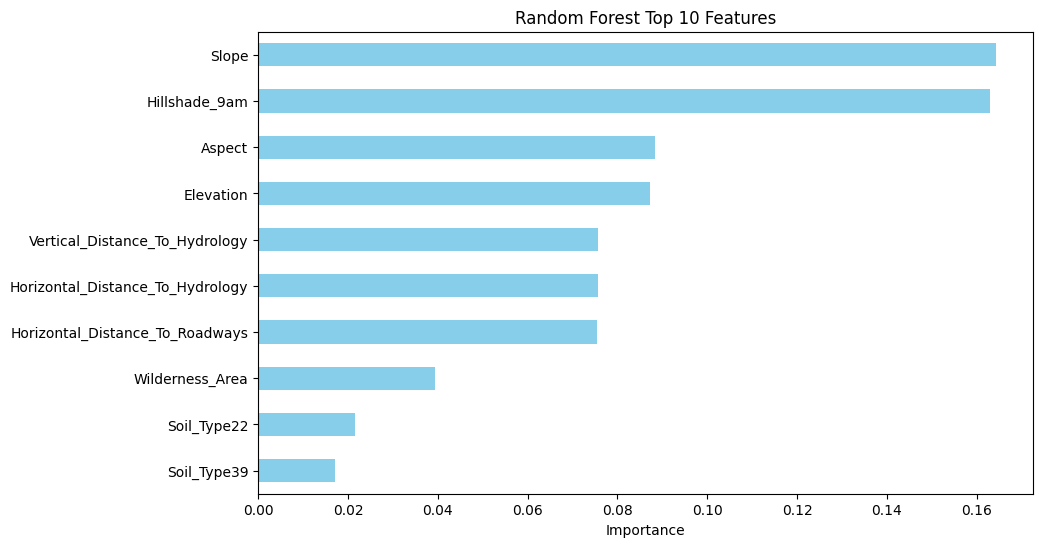

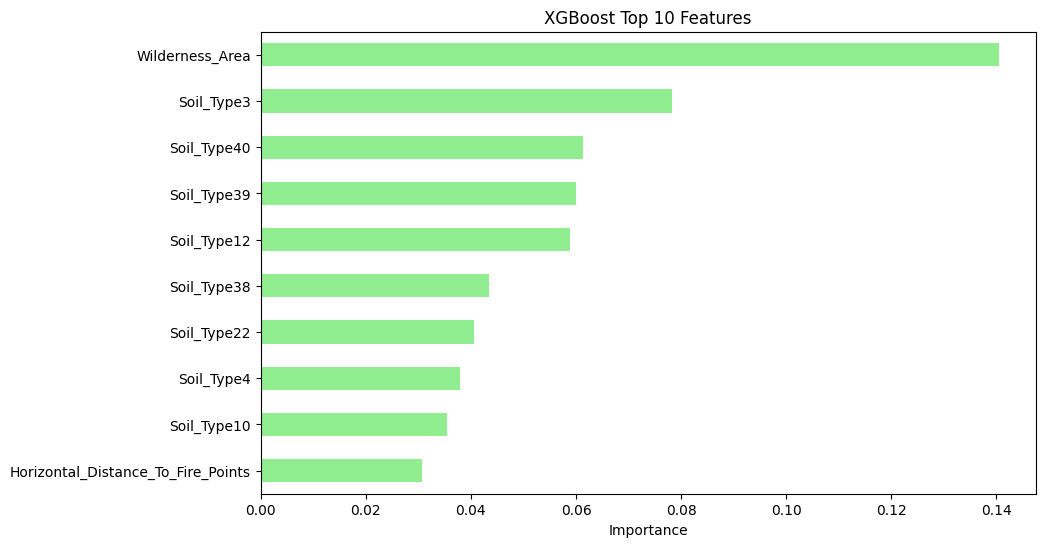

In [20]:
# --- Random Forest Top 10 Features ---
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp_rf[:10].plot(kind='barh', color='skyblue')
plt.title('Random Forest Top 10 Features')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # optional: largest on top
plt.show()

# --- XGBoost Top 10 Features ---
feat_imp_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp_xgb[:10].plot(kind='barh', color='lightgreen')
plt.title('XGBoost Top 10 Features')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # largest on top
plt.show()




# 🌲 Task 3: Multi-Class Forest Cover Classification

## 🎯 Objective

The objective of this task is to predict forest cover type (`Cover_Type`) using environmental and cartographic features.
This is a **multi-class classification problem** with 7 classes.

---

## 📊 Dataset

The Covertype dataset contains numerical environmental attributes such as:

* Elevation
* Aspect
* Slope
* Distance to hydrology, roadways, and fire points
* Hillshade measurements
* Wilderness area indicators
* Soil type indicators

The target variable is `Cover_Type`, representing 7 different forest categories.

---

## 🧹 Data Preparation

* Loaded dataset into Pandas DataFrame
* Separated features (X) and target variable (y)
* Adjusted class labels (1–7 → 0–6) for XGBoost compatibility
* Split data into training and testing sets (80/20)

---

## 🌳 Model 1: Random Forest

Random Forest is an ensemble learning method that builds multiple decision trees and aggregates predictions.

### Evaluation:

* Accuracy score
* Confusion matrix
* Feature importance visualization

---

## 🚀 Model 2: XGBoost

XGBoost is a gradient boosting algorithm optimized for structured data.

### Evaluation:

* Accuracy score
* Confusion matrix
* Feature importance visualization

---

## 📈 Results

Both models achieved strong performance on the multi-class classification task.

Key findings:

* Elevation and environmental distance features were among the most important predictors.
* Tree-based models performed effectively on structured environmental data.

---

## ✅ Conclusion

This task demonstrated:

* Multi-class classification
* Tree-based modeling (Random Forest & XGBoost)
* Model evaluation using accuracy and confusion matrices
* Model interpretation using feature importance

The models successfully predicted forest cover type using environmental features.

